# siriuspy.ramp subpackage

This notebook provides examples on how to use siriuspy.ramp subpackage in order to manipulate booster ramps and storage ring migration power supply waveforms. 

## Modules

These are the modules of the subpackage:

* __magnet.py__: classes implementing the abstraction of magnets. Methods in theses classes are repsonsible to convert magnet integrated strengths to corresponding power supply currents, for example.
* __util.py__: classes to deal with sets of magnets with one associated dipole magnet. Methods here can be invoked to change the waveform of a given power supply and they automatically trigger changes in dependent power supply waveforms. For example, changing the waveform of the booster dipole will automatically change the current waveform of all other magnets, keeping its strengths fixed.
* __optics.py__: module with nominal optics parameter values and response matrix functions. Functions that interact with optics soft IOCs are implemented in this module.

In [1]:
from siriuspy.ramp.magnet import Magnet
from siriuspy.ramp.wfmset import WfmSet
from siriuspy.ramp.optics import get_nominal_integrated_strengths

%matplotlib notebook

# auxilliary function to plot waveforms
def plot_waveform(maname, wfm_strength, wfm_current):
    magnet = Magnet(maname=maname)
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(wfm_strength)
    axarr[1].plot(wfm_current)
    axarr[0].set_title('{} Waveform'.format(maname))
    axarr[1].set_xlabel('Wfm Index')
    axarr[1].set_ylabel('Current [A]')
    axarr[0].set_ylabel('{} [{}]'.format(magnet.strength_label, magnet.strength_units))
    axarr[0].yaxis.grid(True)
    axarr[1].yaxis.grid(True)
    axarr[0].xaxis.grid(True)
    axarr[1].xaxis.grid(True)

## Magnet Objects

Let us first create a Magnet object corresponding to the booster dipole and print its main properties:

In [2]:
magnet = Magnet(maname='BO-Fam:MA-B')
print(magnet)


maname         : BO-Fam:MA-B
section        : BO
dipole_name    : None
family_name    : None
magfunc        : dipole
left           : linear
right          : linear
strength_label : Energy
strength_units : GeV
current_min    : 0.0
current_max    : 990.0


These objects have methos that allows for converting current and strength values back and forth:

In [3]:
strength = 3.0 # [GeV]
current = magnet.conv_strength_2_current(strength=strength)
energy = magnet.conv_current_2_strength(current=current)
print('strength = {} GeV -> current = {} A -> energy = {} GeV'.format(strength,current,energy))

strength = 3.0 GeV -> current = 981.7835215242155 A -> energy = 3.0000000000000004 GeV


## Booster Ramp

Now, magnet objects above may be used as a set within an object of the type __WfmSet__. We first create such an object by defining the dipole magnet of the section. For de booster, for example, we can issue

In [4]:
wfm_set = WfmSet(dipole_maname='BO-Fam:MA-B', dipole_wfm_strength=None, dipole_wfm_current=None)
print('Index @ injection energy {} GeV: {}'.format(WfmSet.energy_inj_gev, wfm_set.index_energy_inj))
print('Index @ ejection  energy {} GeV: {}'.format(WfmSet.energy_eje_gev, wfm_set.index_energy_eje))

Index @ injection energy 0.15 GeV: 79
Index @ ejection  energy 3.0 GeV: 1199


Without passing waveform arguments, either in current or strength units, the class construct uses the default ramp waveform take from __siriuspy.magnet.util.get_default_ramp_waveform__ for the booster, scaling it to the correct energies.

Object methods __get_wfm_current__ and __get_wfm_strength__ can be used to get lists of a magnet waveform in current and strength units, respectively:

<IPython.core.display.Javascript object>


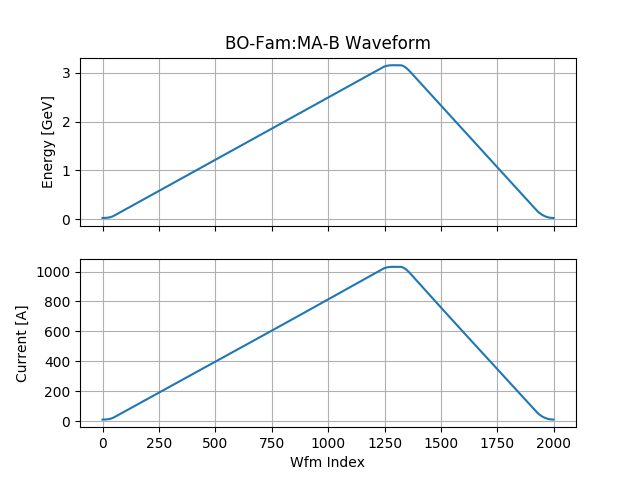

In [5]:
import matplotlib.pyplot as plt

# gets magnet data from waveform set.
wfm_current = wfm_set.get_wfm_current('BO-Fam:MA-B')
wfm_strength = wfm_set.get_wfm_strength('BO-Fam:MA-B')

# plots data using shared x axis
plt.close('all')
plot_waveform('BO-Fam:MA-B', wfm_strength, wfm_current)
plt.show()

### Adding magnets to Waveform Set

Once a dipole magnet is defined for a waveform set, we can add other magnets invoking __set_wfm__ methods, as follows:

<IPython.core.display.Javascript object>


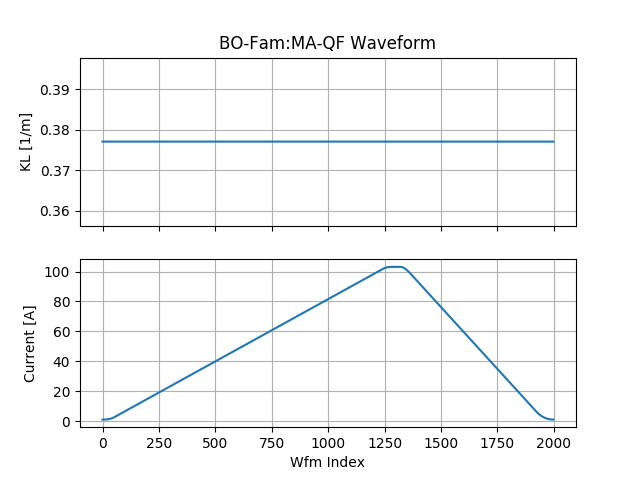

<IPython.core.display.Javascript object>


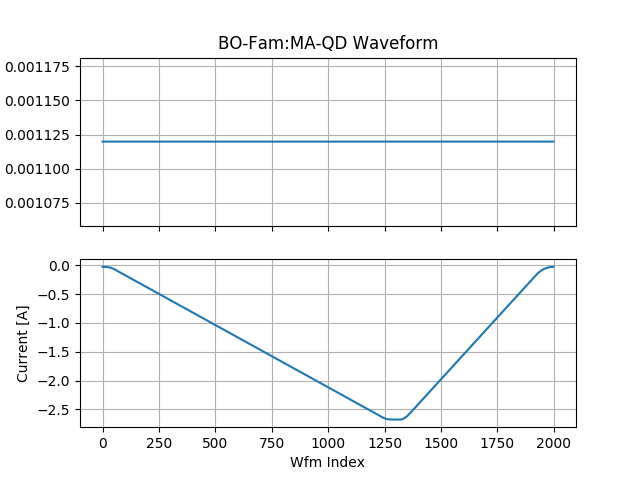

<IPython.core.display.Javascript object>


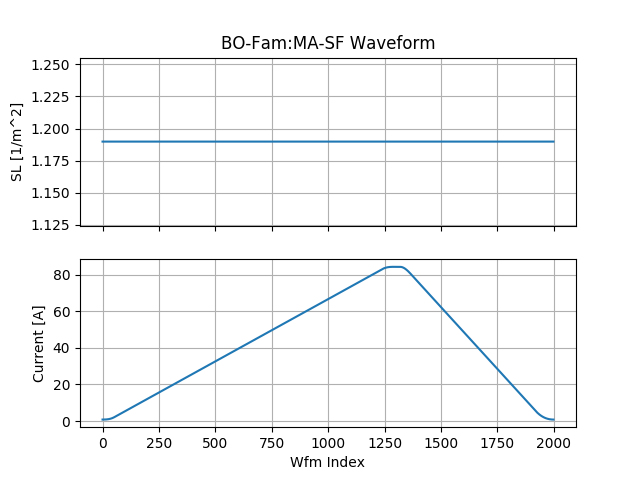

<IPython.core.display.Javascript object>


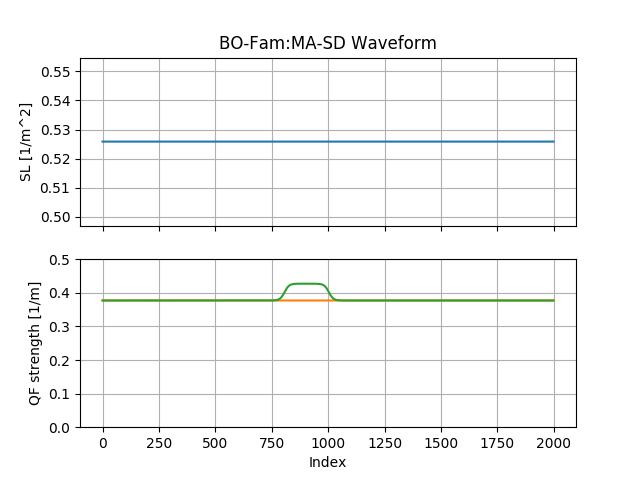

In [6]:
# get tabled nominal integrated strengths
QF = get_nominal_integrated_strengths('BO-Fam:MA-QF')
QD = get_nominal_integrated_strengths('BO-Fam:MA-QD')

# set waveform using nominal values
wfm_set.set_wfm_strength('BO-Fam:MA-QF', wfm=QF)
wfm_set.set_wfm_strength('BO-Fam:MA-QD', wfm=QD)

# by default, waveform without specification is set according to the nominal strength:
wfm_set.set_wfm_strength('BO-Fam:MA-SF')
wfm_set.set_wfm_strength('BO-Fam:MA-SD')

# QF waveform
maname = 'BO-Fam:MA-QF'
wfm_current = wfm_set.get_wfm_current(maname)
wfm_strength = wfm_set.get_wfm_strength(maname)
plot_waveform(maname, wfm_strength, wfm_current)

# QD waveform
maname = 'BO-Fam:MA-QD'
wfm_current = wfm_set.get_wfm_current(maname)
wfm_strength = wfm_set.get_wfm_strength(maname)
plot_waveform(maname, wfm_strength, wfm_current)

# SF waveform
maname = 'BO-Fam:MA-SF'
wfm_current = wfm_set.get_wfm_current(maname)
wfm_strength = wfm_set.get_wfm_strength(maname)
plot_waveform(maname, wfm_strength, wfm_current)

# SD waveform
maname = 'BO-Fam:MA-SD'
wfm_current = wfm_set.get_wfm_current(maname)
wfm_strength = wfm_set.get_wfm_strength(maname)
plot_waveform(maname, wfm_strength, wfm_current)

plt.show()

### Manipulating waveforms

One way to modify waveforms is to add bumps to them. These bumps are characterized by their _delta_, _start_, _stop_ and _transition_ parameters. They are implemented by using the _add_wfm_strength_ method. for example, to add a bump of 0.05 1/m for __BO-Fam:MA-QF__ from the energy of 2.0 to 2.5 GeV, we can issue:

In [7]:
# sets default strength stores original QF waveform
wfm_set.set_wfm_strength(maname='BO-Fam:MA-QF')
qf_orig = wfm_set.get_wfm_strength(maname='BO-Fam:MA-QF')

# get indices corresponding to energy interval
e1, e2 = 2.0, 2.5 # [GeV]
idx1 = wfm_set.index_energy(energy=e1, ramp_down=False)
idx2 = wfm_set.index_energy(energy=e2, ramp_down=False)
print('Index @ energy {} GeV: {}'.format(e1, idx1))
print('Index @ energy {} GeV: {}'.format(e2, idx2))

# add bump pf 0.05 1/m from 2.0 to 2.5 GeV and with 20 smoothening points
wfm_set.add_wfm_strength(maname='BO-Fam:MA-QF', delta=0.05, start=idx1, stop=idx2, border=20)

# stores waveform with bump
qf_bump = wfm_set.get_wfm_strength(maname='BO-Fam:MA-QF')

plt.plot(qf_orig)
plt.plot(qf_bump)
plt.ylim([0,0.5])
plt.grid(True)
plt.xlabel('Index')
plt.ylabel('QF strength [1/m]')
plt.show()

Index @ energy 2.0 GeV: 807
Index @ energy 2.5 GeV: 1004


<IPython.core.display.Javascript object>


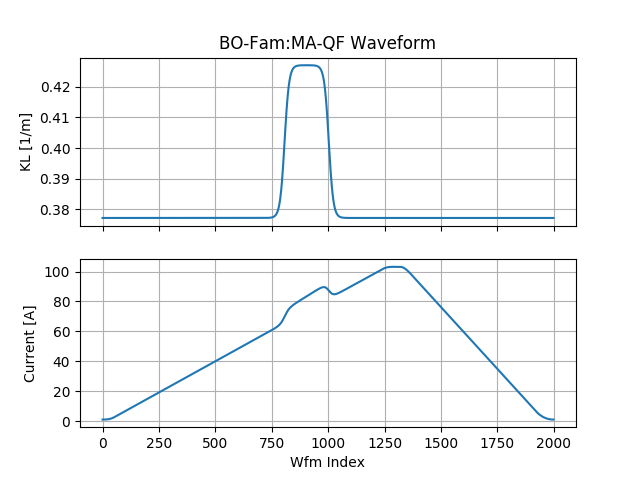

In [8]:
# QF waveform
maname = 'BO-Fam:MA-QF'
wfm_current = wfm_set.get_wfm_current(maname)
wfm_strength = wfm_set.get_wfm_strength(maname)

plot_waveform(maname, wfm_strength, wfm_current)
plt.show()